In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display

# Метод k ближайших соседей (knn)

### Классификация

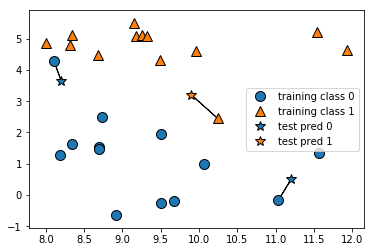

In [2]:
# иллюстрация метода 1 ближайшего соседа
mglearn.plots.plot_knn_classification(n_neighbors=1)

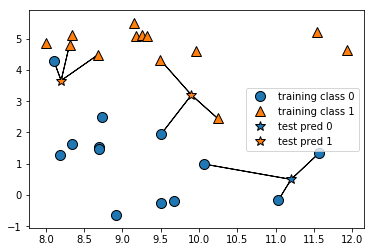

In [3]:
# иллюстрация метода 3 ближайших соседей
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [4]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [5]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [6]:
print("Прогнозы на тестовом наборе: {}".format(clf.predict(X_test)))
print("Правильность на тестовом наборе: {:.3f}".format(clf.score(X_test, y_test)))

correct_predictions = [x for x in list(range(len(y_test))) if clf.predict(X_test)[x] == y_test[x]]
print("Суть оценки праильности: {:.3f}".format(len(correct_predictions) / len(y_test)))

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]
Правильность на тестовом наборе: 0.857
Суть оценки праильности: 0.857


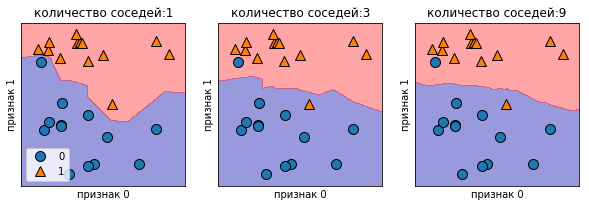

In [7]:
# рисуем границы принятия решений
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
# создаем объект-классификатор и подгоняем в одной строке
 clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("количество соседей:{}".format(n_neighbors))
 ax.set_xlabel("признак 0")
 ax.set_ylabel("признак 1")
axes[0].legend(loc=3)

На рисунке слева можно увидеть, что использование модели одного
ближайшего соседа дает границу принятия решений, которая очень
хорошо согласуется с обучающими данными. Увеличение числа соседей
приводит к сглаживанию границы принятия решений. Более гладкая
граница соответствует более простой модели. Другими словами,
использование нескольких соседей соответствует высокой сложности
модели (как показано в правой части рис. 2.1), а использование большого
количества соседей соответствует низкой сложности модели (как
показано в левой части рис. 2.1). Если взять крайний случай, когда
количество соседей будет равно количеству точек данных обучающего
набора, каждая точка тестового набора будет иметь одних и тех же
соседей (соседями будет все точки обучающего набора) и все прогнозы
будут одинаковыми: будет выбран класс, который является наиболее
часто встречающимся в обучающем наборе.

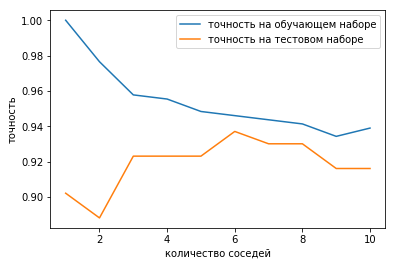

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
 # строим модель
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # записываем правильность на обучающем наборе
 training_accuracy.append(clf.score(X_train, y_train))
 # записываем правильность на тестовом наборе
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="точность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="точность на тестовом наборе")
plt.ylabel("точность")
plt.xlabel("количество соседей")
plt.legend()

### Регрессия

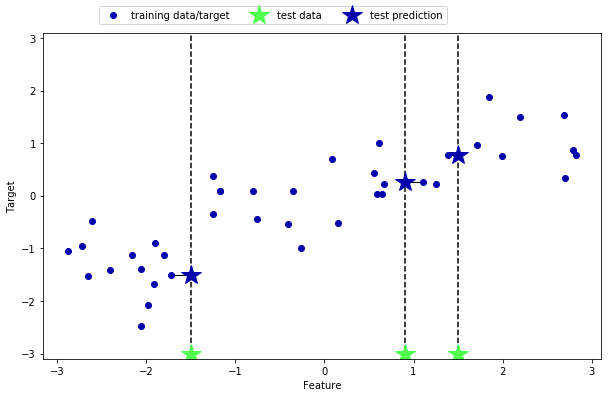

In [9]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

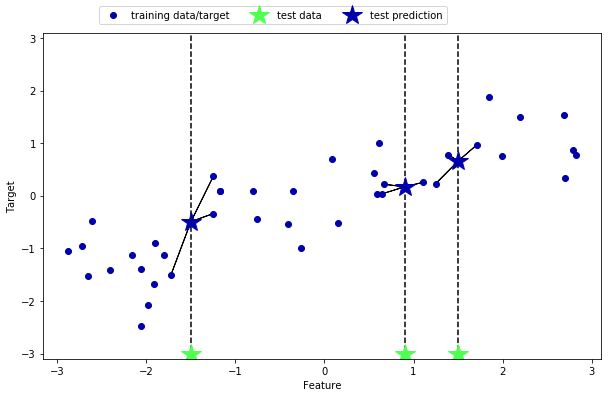

In [10]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [11]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# разбиваем набор данных wave на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# создаем экземпляр модели и устанавливаем количество соседей равным 3
reg = KNeighborsRegressor(n_neighbors=3)
# подгоняем модель с использованием обучающих данных и обучающих ответов
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [12]:
print("Прогнозы для тестового набора:\n{}".format(reg.predict(X_test)))

Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [13]:
print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test)))

R^2 на тестовом наборе: 0.83


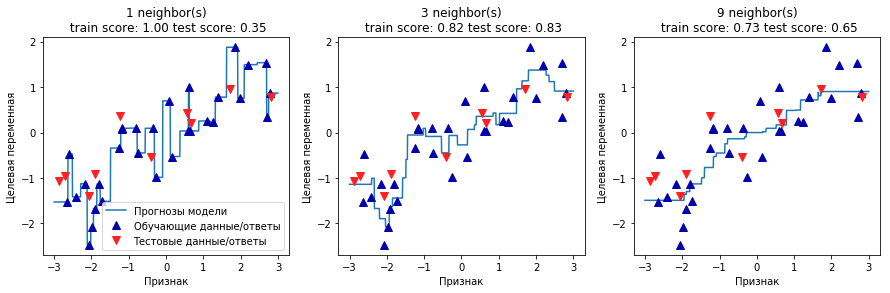

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
 # получаем прогнозы, используя 1, 3, и 9 соседей
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Признак")
 ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",
 "Тестовые данные/ответы"], loc="best")

# Линейные модели

## Линейные модели для регрессии

w[0]: 0.393906  b: -0.031804


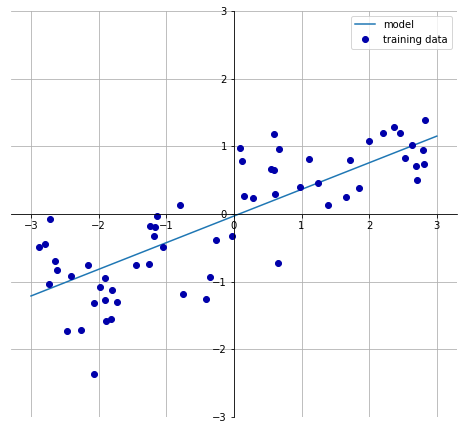

In [15]:
mglearn.plots.plot_linear_regression_wave()

### Линейная регрессия (обычный метод наименьших квадратов)

In [16]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [17]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [18]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.66


In [19]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.61


### Гребневая регрессия

В гребневой регрессии коэффициенты (w)
выбираются не только с точки зрения того, насколько хорошо они
позволяют предсказывать на обучающих данных, они еще подгоняются в
соответствии с дополнительным ограничением. Нам нужно, чтобы
величина коэффициентов была как можно меньше. Другими словами, все
элементы w должны быть близки к нулю. Это означает, что каждый
признак должен иметь как можно меньшее влияние на результат (то есть
каждый признак должен иметь небольшой регрессионный коэффициент)
и в то же время он должен по-прежнему обладать хорошей прогнозной
силой. Это ограничение является примером регуляризации
(regularization). 

```**Регуляризация** означает явное ограничение модели для
предотвращения переобучения. Регуляризация, использующаяся в
гребневой регрессии, известна как L2 регуляризация.```

In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

Правильность на обучающем наборе: 0.89
Правильность на тестовом наборе: 0.75


In [21]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))

Правильность на обучающем наборе: 0.79
Правильность на тестовом наборе: 0.64


In [22]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))

Правильность на обучающем наборе: 0.93
Правильность на тестовом наборе: 0.77


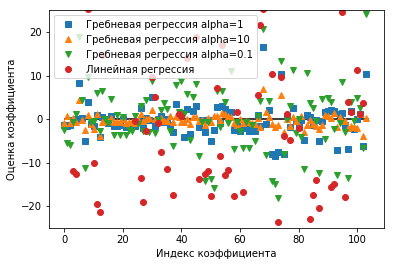

In [23]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

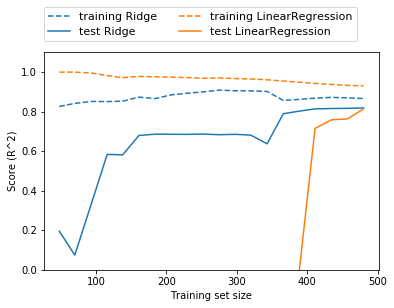

In [24]:
mglearn.plots.plot_ridge_n_samples()

```При достаточном объеме обучающих данных регуляризация становится
менее важной и при удовлетворительном объеме данных гребневая и
линейная регрессии будут демонстрировать одинаковое качество работы
(тот факт, что в данном случае это происходит при использовании
полного набора данных, является просто случайностью).```

### Лассо

In [25]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))

Правильность на обучающем наборе: 0.29
Правильность на контрольном наборе: 0.21
Количество использованных признаков: 4


In [26]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))

Правильность на обучающем наборе: 0.90
Правильность на тестовом наборе: 0.77
Количество использованных признаков: 33


In [28]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso00001.coef_ != 0)))

Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.64
Количество использованных признаков: 94


Text(0,0.5,'Оценка коэффициента')

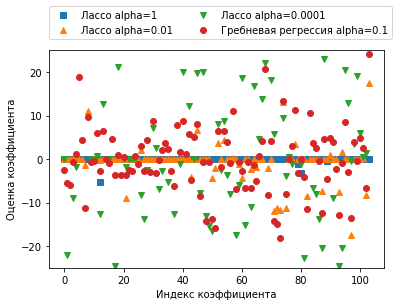

In [29]:
plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

## Линейные модели для классификации

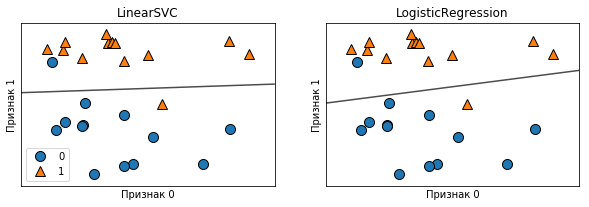

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
 clf = model.fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
 ax=ax, alpha=.7)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{}".format(clf.__class__.__name__))
 ax.set_xlabel("Признак 0")
 ax.set_ylabel("Признак 1")
axes[0].legend()